In [10]:
import pandas as pd
from WindPy import w
import empyrical
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!
You can use w.menu to help yourself to create commands(WSD,WSS,WST,WSI,WSQ,...)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [3]:
def wind2df(raw_data):
    dic = {}
    for data, field in zip(raw_data.Data, raw_data.Fields):
        dic[field.lower()] = data
    if len(raw_data.Times) == len(raw_data.Data[0]):
        return pd.DataFrame(dic, index=raw_data.Times)
    else:
        return pd.DataFrame(dic)

In [4]:
data = w.wsd('000016.SH', 'close', '1990-01-01', '2017-10-27')

In [5]:
df = wind2df(data)

In [8]:
df.dropna(inplace=True)

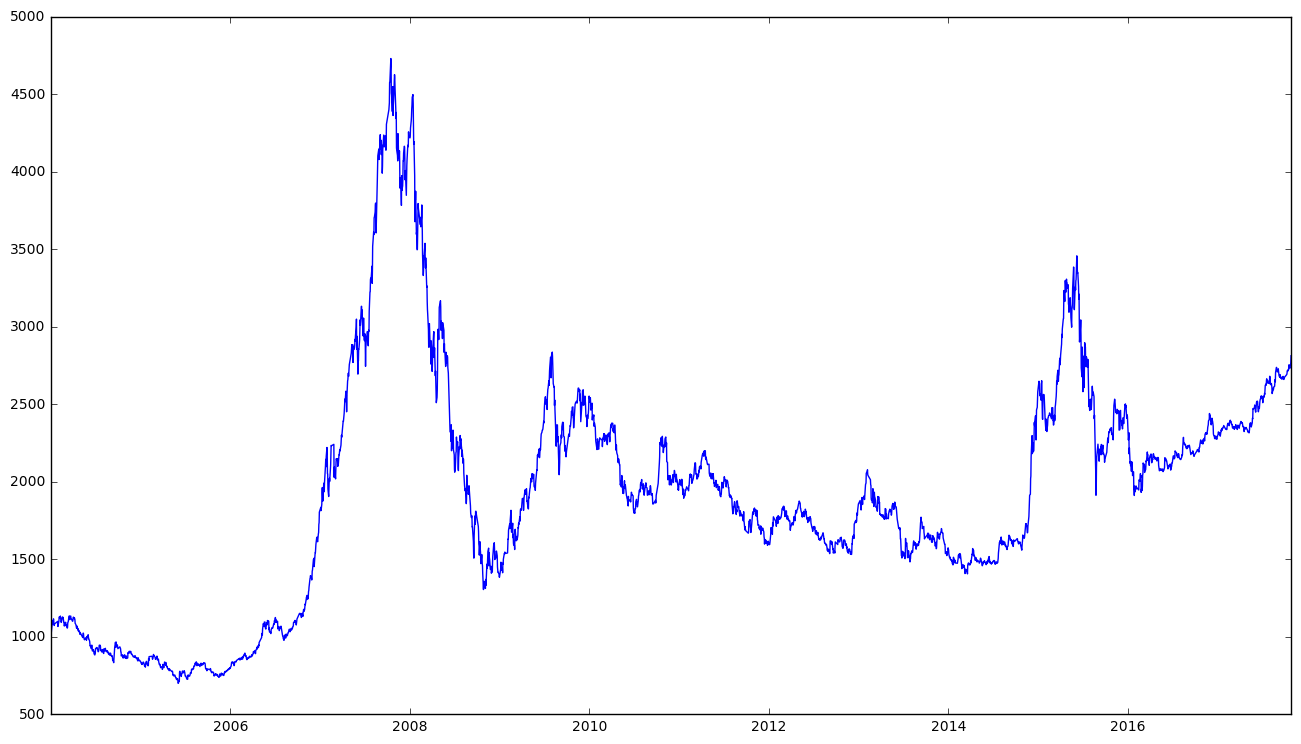

In [9]:
plt.figure(figsize=(16, 9))
df['close'].plot()

In [11]:
df['mdd'] = df['close'].pct_change().rolling(window=20).apply(lambda x: empyrical.max_drawdown(x))

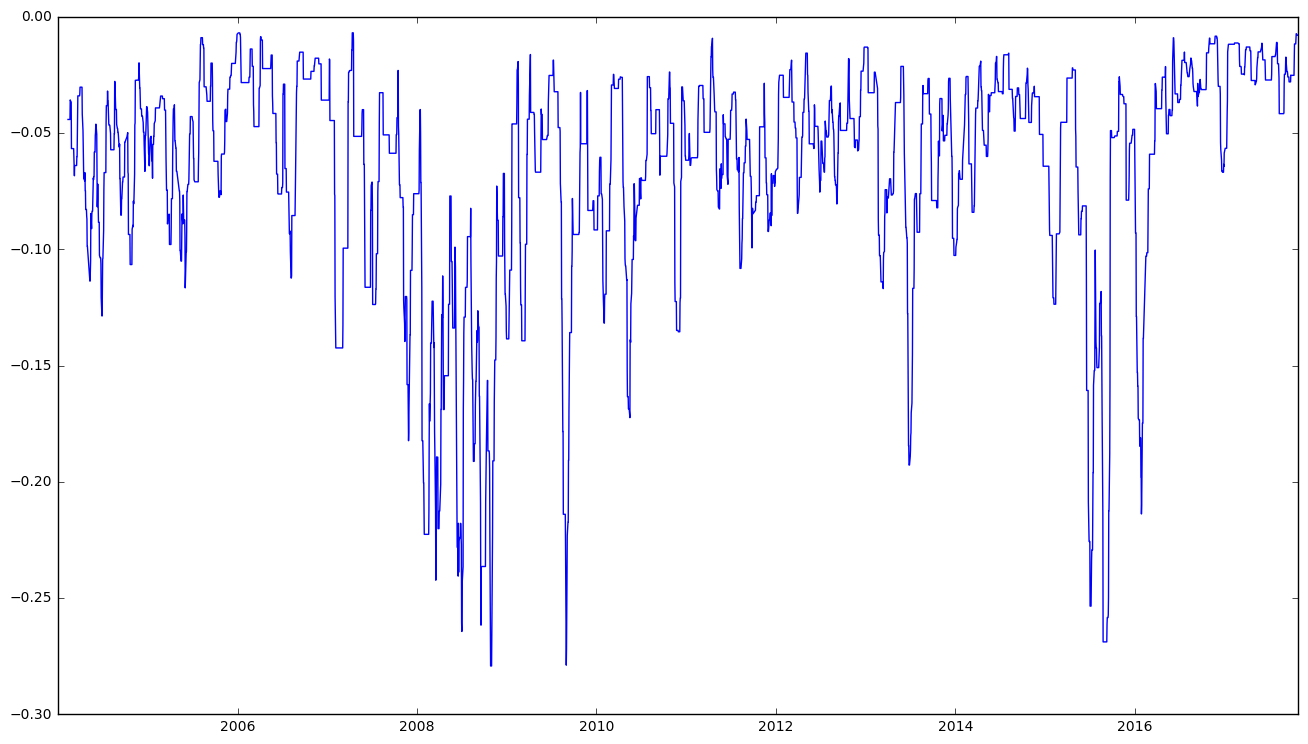

In [12]:
plt.figure(figsize=(16, 9))
df['mdd'].plot()

(array([   6.,    0.,    1.,   10.,    0.,    1.,    3.,    3.,    1.,
           3.,    2.,    0.,    1.,    4.,    2.,    9.,    1.,    0.,
           4.,    7.,   15.,    4.,    4.,    7.,   11.,    5.,    1.,
           0.,    3.,    3.,    2.,    4.,   14.,    8.,    6.,    9.,
           6.,    3.,    7.,    5.,   10.,    5.,    5.,    7.,   11.,
          17.,    7.,    7.,    4.,    2.,   23.,   31.,   19.,   15.,
           6.,   11.,    3.,   44.,   19.,   36.,   15.,    9.,   18.,
          22.,   40.,   30.,   21.,   35.,   72.,   11.,   28.,   62.,
          45.,   56.,   92.,   39.,   89.,   86.,   53.,   66.,  105.,
          51.,   73.,  152.,  111.,  138.,   86.,  113.,   77.,  132.,
         173.,  128.,  157.,  105.,   79.,   91.,   75.,   39.,   67.,   39.]),
 array([-0.27914929, -0.27642608, -0.27370286, -0.27097965, -0.26825643,
        -0.26553321, -0.26281   , -0.26008678, -0.25736357, -0.25464035,
        -0.25191714, -0.24919392, -0.24647071, -0.24374749, -0.2

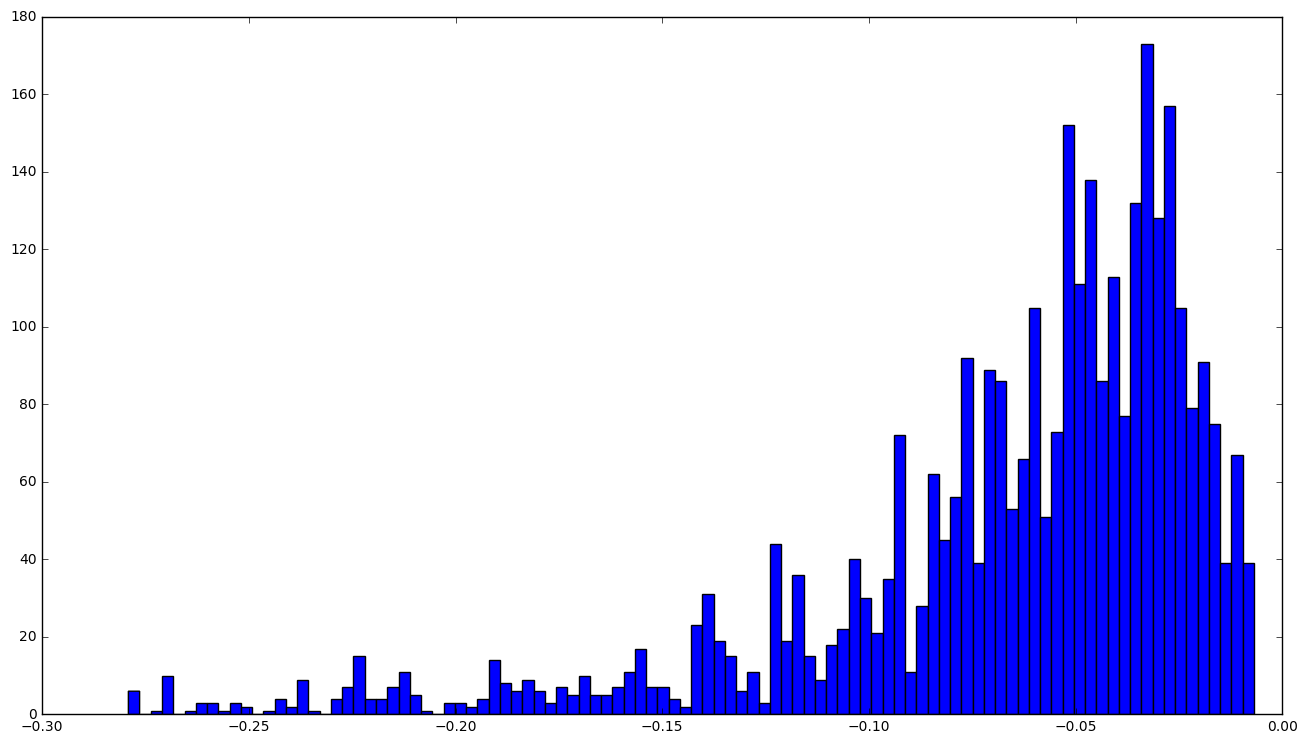

In [22]:
plt.figure(figsize=(16, 9))
x = df['mdd'].dropna().values
plt.hist(x, bins=100)